# Course 1: Classification and Vector Spaces
# Week 1: Logistic Regression for Sentiment Analysis of Tweets

## Lecture 2: Building frequency vectors

In this lab, we will focus on the build_freqs() helper function and visualizing a dataset fed into it. In our goal of tweet sentiment analysis, this function will build a dictionary where we can lookup how many times a word appears in the lists of positive or negative tweets. This will be very helpful when extracting the features of the dataset in the week's programming assignment. Let's see how this function is implemented under the hood in this notebook.

## Setup

In [38]:
%%capture
%run lecture1.ipynb

## Word Frequency Dictionary

We need to build a structure containing information of a word, and how many times it appears in the positive and negative tweets.

We will feed the function a list of tweets, and a binary list of whether the tweet is positive or negative in that position. 
It will return a dictionary where the keys are the words in the tweets, and the values are the number of times the word appears in the positive or negative tweets.


In [41]:
def build_freqs(tweets, labels):
    """
    Takes a list of tweets, and a list of labels indicating the sentiment of each tweet.
    Returns a dictionary that maps each word to the number of positive and negative tweets that contain it.
    Example:
    {
        "word":
        {
            "positive": 3,
            "negative": 4
        }
    }
    """

    freqs = {}
    for i in range(len(tweets)):
        tweet = tweets[i]
        label = labels[i]
        for word in process_text(tweet):
            if word not in freqs:
                freqs[word] = {"positive": 0, "negative": 0}
            if label == 1:
                freqs[word]["positive"] += 1
            else:
                freqs[word]["negative"] += 1
    return freqs

In [42]:
# Build the tweet array
tweets = np.append(pos_tweets, neg_tweets)
labels = np.append(np.ones(len(pos_tweets)), np.zeros(len(neg_tweets)))

# Build the frequency dictionary
freqs = build_freqs(tweets, labels)

# Print length and type of freqs
print(len(freqs))
print(type(freqs))


9638
<class 'dict'>
[('top', {'positive': 32, 'negative': 6}), ('engag', {'positive': 7, 'negative': 0}), ('member', {'positive': 16, 'negative': 6}), ('commun', {'positive': 32, 'negative': 2}), ('week', {'positive': 83, 'negative': 56})]


## Representing the Data

We will plot the 100 most repeated words in the positive and negative tweets.

In [47]:
# Sort the dictionary by the of occurrences
sorted_freqs = sorted(freqs.items(), key=lambda x: x[1]["positive"] + x[1]["negative"], reverse=True)
sorted_freqs[:5]

[(':(', {'positive': 1, 'negative': 4584}),
 (':)', {'positive': 3690, 'negative': 2}),
 ('thank', {'positive': 643, 'negative': 107}),
 ('follow', {'positive': 443, 'negative': 263}),
 (':-)', {'positive': 701, 'negative': 0})]

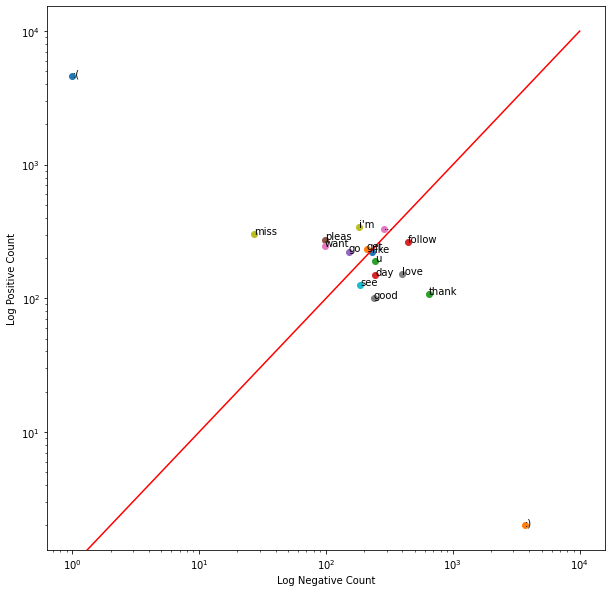

In [58]:
# Plot the top 50 words by positive and negative tweets
# Draw a point for each word. X axis is the number of positive tweets, Y axis is the number of negative tweets.
# Log scale

plt.figure(figsize=(10,10))
for word, freq in sorted_freqs[:20]:
    plt.scatter(freq["positive"], freq["negative"])
    plt.annotate(word, (freq["positive"], freq["negative"]))
    
plt.plot([0, 10000], [0, 10000], color="red")
plt.xlabel("Log Negative Count")
plt.ylabel("Log Positive Count")
plt.xscale("log")
plt.yscale("log")
plt.show()
